## Taking Tesla Stock Price
importing needed libraries

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
from keras.layers import Dropout, Bidirectional

Loading of stocks dataset

In [3]:
data = pd.read_csv('C:/Users/Lenovo/Downloads/tesla-stock-price.csv')

reading the dataset 

In [4]:
data.head()

,date,close,volume,open,high,low
0,11:34,270.49,"4,787,699",264.50,273.88,262.2400
1,2018/10/15,259.59,6189026.0000,259.06,263.28,254.5367
2,2018/10/12,258.78,7189257.0000,261.00,261.99,252.0100
3,2018/10/11,252.23,8128184.0000,257.53,262.25,249.0300
4,2018/10/10,256.88,12781560.0000,264.61,265.51,247.7700


In [5]:
# data.isnull().sum()
data.shape

(757, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    757 non-null    object 
 1   close   757 non-null    float64
 2   volume  757 non-null    object 
 3   open    757 non-null    float64
 4   high    757 non-null    float64
 5   low     757 non-null    float64
dtypes: float64(4), object(2)
memory usage: 35.6+ KB


### observation:
There are 757 entries and 6 columns in this stock price dataset of Tesla.
leaving 2 object type columns, all others are float.

In [32]:
# data.sort_values(by='high', ascending=False).head()

Replacing some of the characters in the dataset which occur to be string by float type

In [ ]:
data['volume'] = data['volume'].str.replace(',','').astype(float)

In [9]:
# data
# Convert date column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Convert volume column to float type
data['volume'] = data['volume'].astype(float)

In [10]:
#use the datetime as the index of dataframe, 
#to use it as a time series data
data.set_index('date', inplace=True)

converting the data columns into one type so as to be easy to apply the `fit_transform method` for preprocessing the data

In [11]:
# Preprocess the data
Ms = MinMaxScaler()
data['volume'] = Ms.fit_transform(data[['volume']])
data [data.columns] = Ms.fit_transform(data)

In [12]:
data.head()

,close,volume,open,high,low
date,,,,,
2024-02-15 11:34:00,0.525504,0.123983,0.499980,0.506776,0.508571
2018-10-15 00:00:00,0.480338,0.166593,0.477718,0.461601,0.476245
2018-10-12 00:00:00,0.476982,0.197007,0.485657,0.456103,0.465641
2018-10-11 00:00:00,0.449840,0.225557,0.471457,0.457211,0.453136
2018-10-10 00:00:00,0.469109,0.367053,0.500430,0.471105,0.447848


### Splitting of Data into training and testing sets

In [13]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.7)
# test_size = len(data) - train_size
train_data, test_data = data[0:train_size], data[train_size:]

#### Creating sequences and Labels 

In [14]:
# Create sequences and labels for training
def create_sequence(dataset):
    sequences = []
    label = []
    start_idx = 0
    for stop_idx in range(50, len(dataset)):
        sequences.append(dataset.iloc[start_idx:stop_idx])
        label.append(dataset.iloc[stop_idx])
        start_idx +=1
    return (np.array(sequences), np.array(label))


In [15]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

#### Building the LSTM model

In [16]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_seq.shape[1], train_seq.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(units=50))
model.add(Dense(5))


In [17]:
#compile model
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['mean_absolute_error'])

#### Training the model

In [18]:
# Train the model
model.fit(train_seq, train_label, epochs=80, validation_data = (test_seq, test_label), verbose=1)

Epoch 1/80
15/15 [==============================] - 20s 405ms/step - loss: 0.1258 - mean_absolute_error: 0.2549 - val_loss: 0.0311 - val_mean_absolute_error: 0.1375
Epoch 2/80
15/15 [==============================] - 4s 276ms/step - loss: 0.0161 - mean_absolute_error: 0.1011 - val_loss: 0.0083 - val_mean_absolute_error: 0.0692
Epoch 3/80
15/15 [==============================] - 4s 244ms/step - loss: 0.0098 - mean_absolute_error: 0.0785 - val_loss: 0.0085 - val_mean_absolute_error: 0.0713
Epoch 4/80
15/15 [==============================] - 4s 285ms/step - loss: 0.0077 - mean_absolute_error: 0.0680 - val_loss: 0.0059 - val_mean_absolute_error: 0.0592
Epoch 5/80
15/15 [==============================] - 4s 242ms/step - loss: 0.0070 - mean_absolute_error: 0.0644 - val_loss: 0.0055 - val_mean_absolute_error: 0.0573
Epoch 6/80
15/15 [==============================] - 4s 262ms/step - loss: 0.0065 - mean_absolute_error: 0.0613 - val_loss: 0.0052 - val_mean_absolute_error: 0.0563
Epoch 7/80
15/1

#### Making Predictions 

In [19]:
# Make predictions
test_predict = model.predict(test_seq)

6/6 [==============================] - 5s 88ms/step


In [20]:
# Inverse transform predictions to original scale

test__inverse_predict = Ms.inverse_transform(test_predict)


In [31]:
print(test__inverse_predict)

[[2.09465134e+02 1.31080523e-01 2.10973068e+02 2.12686508e+02
  2.06395096e+02]
 [2.08261826e+02 1.33980036e-01 2.09758850e+02 2.11483322e+02
  2.05235260e+02]
 [2.06011200e+02 1.39370143e-01 2.07569580e+02 2.09191132e+02
  2.02931580e+02]
 [2.02471985e+02 1.47585213e-01 2.04151337e+02 2.05608551e+02
  1.99316940e+02]
 [1.98985245e+02 1.52840152e-01 2.00749420e+02 2.02047348e+02
  1.95721939e+02]
 [1.96948425e+02 1.62826136e-01 1.98872482e+02 2.00328690e+02
  1.94018799e+02]
 [1.96835876e+02 2.11434618e-01 1.99732483e+02 2.01973953e+02
  1.95532181e+02]
 [2.02708115e+02 1.98492751e-01 2.04698090e+02 2.06962204e+02
  2.00902100e+02]
 [2.09262589e+02 1.73529938e-01 2.10193558e+02 2.12436356e+02
  2.06516953e+02]
 [2.13819077e+02 1.50745884e-01 2.13843445e+02 2.15962128e+02
  2.10099075e+02]
 [2.16506348e+02 1.31953195e-01 2.15837082e+02 2.17888107e+02
  2.12078308e+02]
 [2.17959091e+02 1.19391389e-01 2.16901855e+02 2.18965195e+02
  2.13196991e+02]
 [2.18278931e+02 1.14548065e-01 2.171401

### Visualizing the predicted and Actual values

In [33]:
# Compute the actual values for the entire test set
test__inverse_actual = Ms.inverse_transform(test_label)

In [35]:
import matplotlib.pyplot as plt

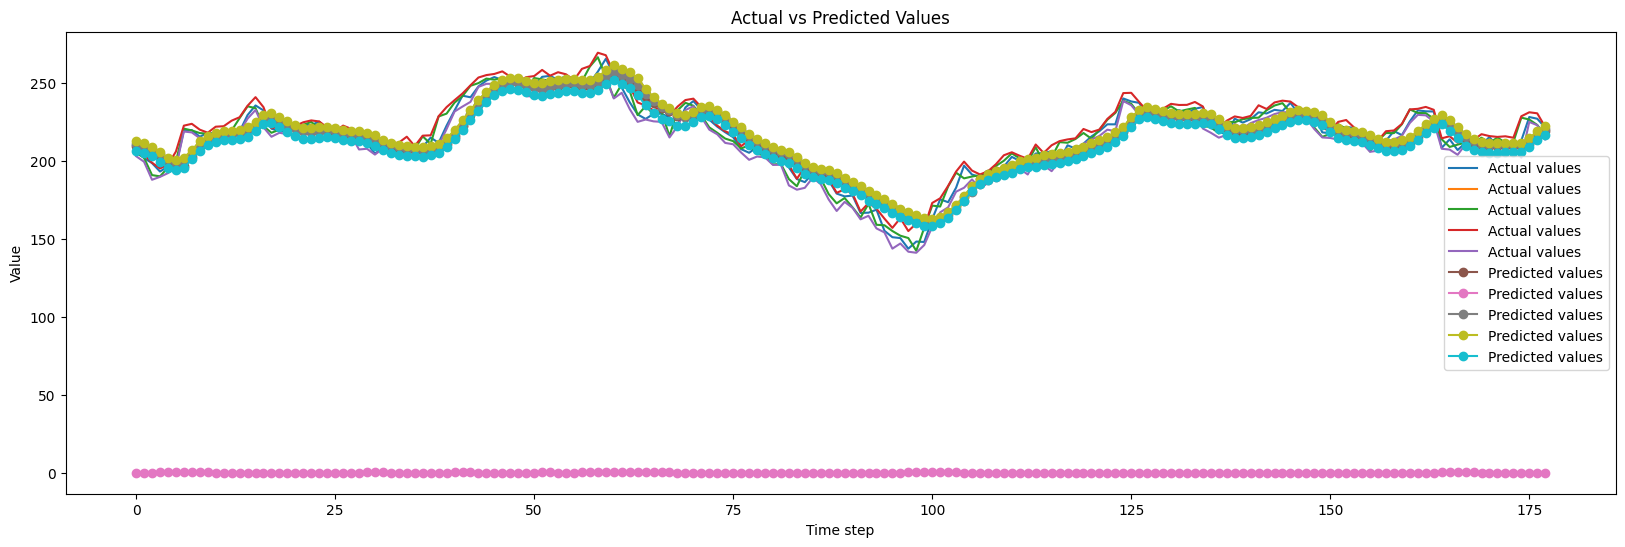

In [40]:
# Plot the actual and predicted values
plt.figure(figsize=(20,6))

plt.plot(test__inverse_actual, label='Actual values')
plt.plot(test__inverse_predict, label='Predicted values', marker='o')
plt.legend()
plt.xlabel('Time step')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.show()

#### Observation:
Here we can see that the predicted values are almost similar or we can say close to the actual values, which also says the accuracy of the model made.

### Checking Accuracy of the Model

In [30]:
# print(test__inverse_predict)
# Compute the mean absolute error on the test set
test_mae = mean_absolute_error(test_label, test_predict)
print(f'Test set mean absolute error: {test_mae}')

Test set mean absolute error: 0.035463512040562126


In [22]:
from sklearn.model_selection import TimeSeriesSplit

For making it a Time series Model

In [23]:
# Calculate the Mean Absolute Error and Mean Squared Error
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

In [24]:
# Define the cross-validation strategy
tscv = TimeSeriesSplit(n_splits=5)

# Define the scoring function
def scoring_mae(test_label, test__inverse_predict):
    return -mean_absolute_error(test_label, test__inverse_predict)


#### Performing Cross-Validation between actual and predicted value

In [25]:
# Perform cross-validation
cv_scores = []
for train_index, val_index in tscv.split(train_seq):
    X_train_fold, X_val_fold = train_seq[train_index], train_seq[val_index]
    y_train_fold, y_val_fold = train_label[train_index], train_label[val_index]

    # Train the model on the current fold
    model.fit(X_train_fold, y_train_fold, epochs=1, batch_size=1, verbose=0)

    # Evaluate the model on the current fold
    y_pred_fold = model.predict(X_val_fold)
    y_pred_fold = np.squeeze(y_pred_fold)  # remove extra dimensions
    mae_fold = mean_absolute_error(y_val_fold, y_pred_fold)
    cv_scores.append(mae_fold)

# Calculate the average cross-validation score
cv_score = np.mean(cv_scores)
print(f'Cross-validation score: {cv_score}')

3/3 [==============================] - 0s 65ms/step
Cross-validation score: 0.0475383543054973
